In [1]:
! pip install polars

                                              0.0/19.3 MB ? eta -:--:--
                                              0.1/19.3 MB 2.6 MB/s eta 0:00:08
                                              0.4/19.3 MB 5.1 MB/s eta 0:00:04
     -                                        1.0/19.3 MB 7.5 MB/s eta 0:00:03
     ---                                      1.5/19.3 MB 7.9 MB/s eta 0:00:03
     ----                                     2.0/19.3 MB 8.7 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9.1 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9.1 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9.1 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9.1 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9.1 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9.1 MB/s eta 0:00:02
     -----                                    2.4/19.3 MB 9

In [1]:
import polars as pl
import numpy as np

def read_parquet(filename: str) -> pl.DataFrame:
    df1 = pl.read_parquet(filename)
    df1 = df1.with_row_count().with_columns((pl.col("row_nr").cast(pl.Float32) / 20000.0 * 1000000000.0).cast(pl.Time))
    df1 = df1.rename({"row_nr": "time"})
    return df1


df2 = read_parquet("data2.parquet")
df1 = read_parquet("data1.parquet")
df1

FileNotFoundError: No such file or directory: data2.parquet

In [36]:
df2

time,CH1_Moment,CH2_Kraft,CH3_SyncSig,CH4_akustik,CH5_a1_WSAS,CH6_a2_WSAF,CH7_a3_BOZA
time,f32,f32,f32,f32,f32,f32,f32
00:00:00,-25.056,275.903992,10.9664,-0.0012,-4.832,-2.936,-0.16
00:00:00.000050,-33.048,714.66803,10.973599,-0.0092,-4.952,-7.968,0.24
00:00:00.000100,-26.711998,486.664001,10.9688,-0.0192,-4.608,-13.64,2.08
00:00:00.000150,-11.952,-252.912003,10.967199,-0.047,-5.928,-8.6,3.0
00:00:00.000200,0.36,-956.083984,10.9664,-0.0674,-4.384,0.344,3.76
00:00:00.000250,5.616,-1076.791992,10.9688,-0.1006,-0.96,1.824,4.04
00:00:00.000300,7.992,-735.744019,10.973599,-0.1568,0.152,1.416,3.6
00:00:00.000350,12.167999,-396.612,10.973599,-0.1796,0.808,2.632,3.4
00:00:00.000400,19.727999,-178.188004,10.9592,-0.1882,1.632,0.8,2.64


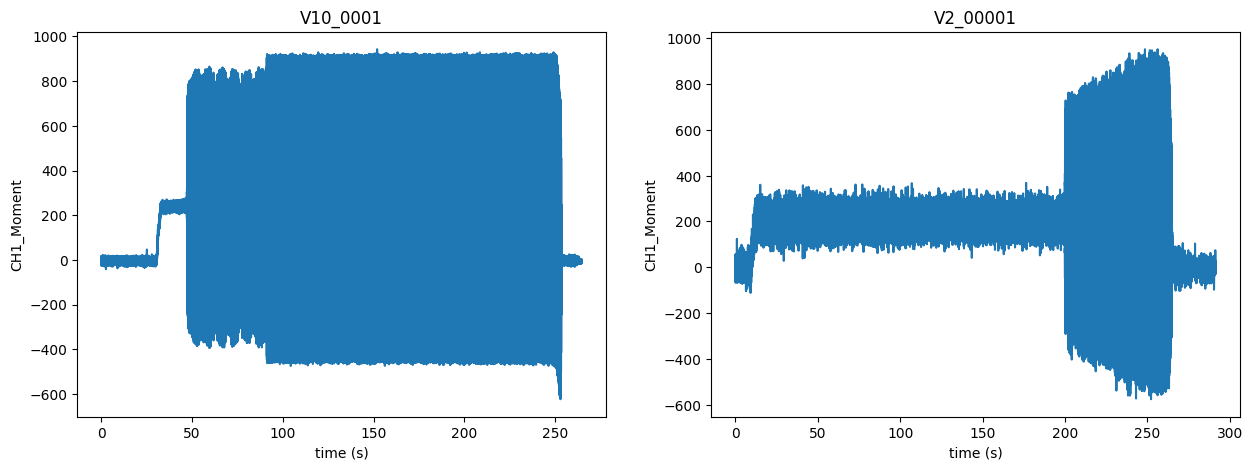

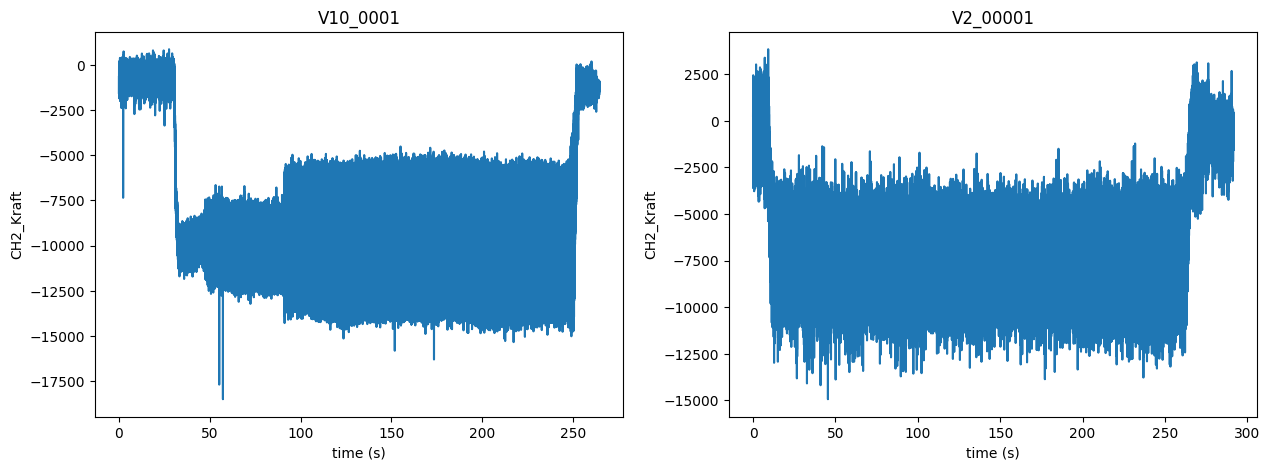

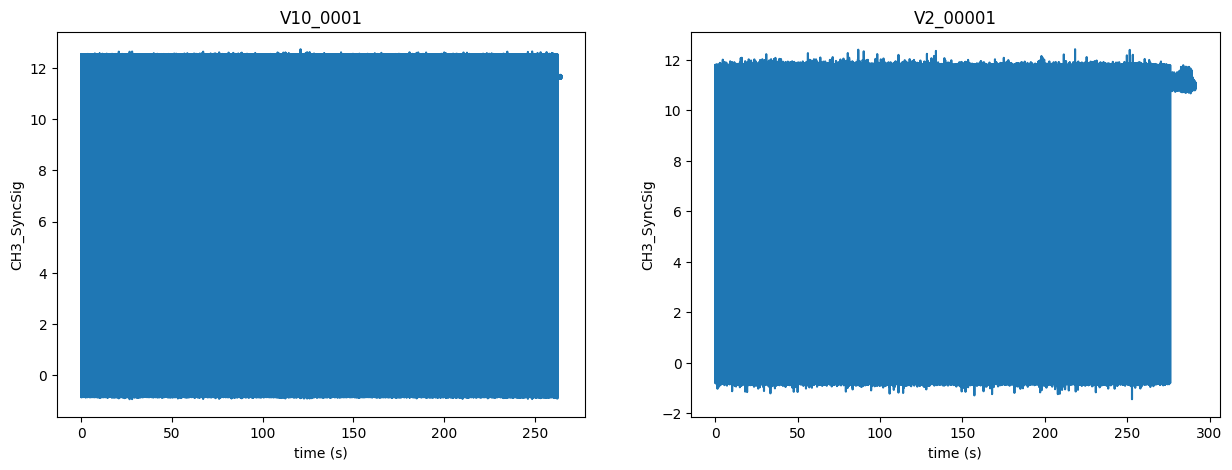

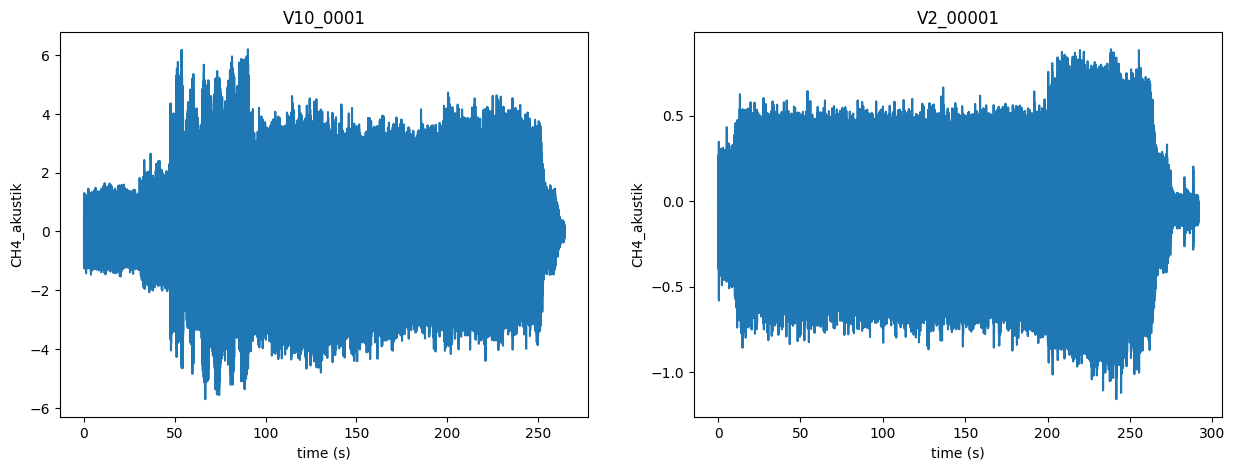

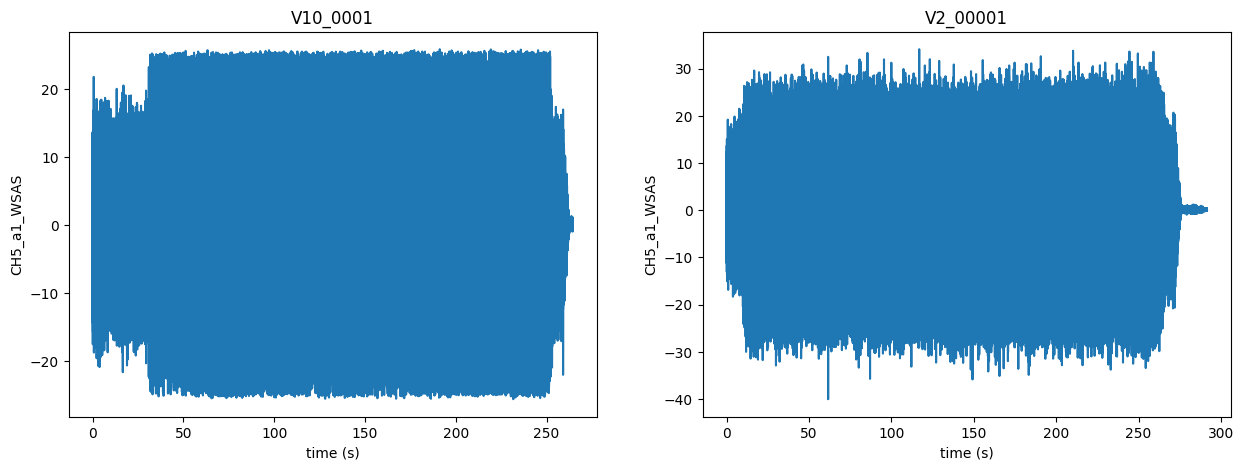

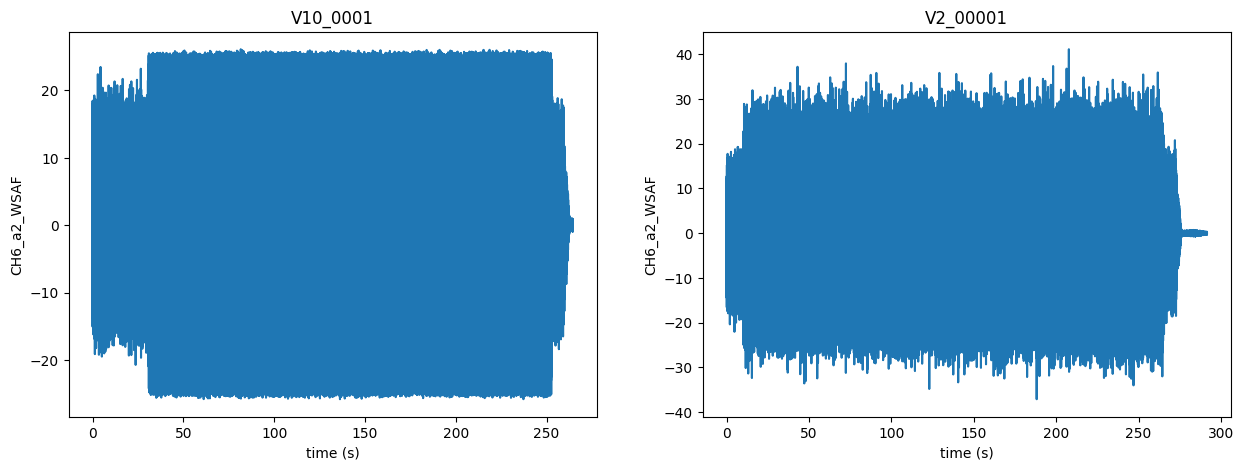

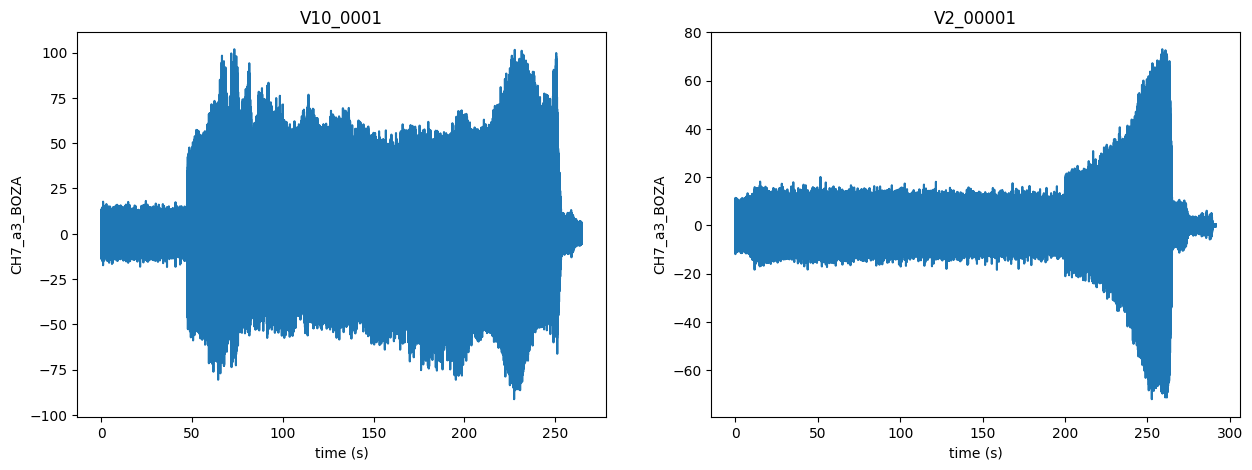

In [39]:
# make a plot of the data column CH1_Moment
import matplotlib.pyplot as plt

def plot_column_over_time(df: pl.DataFrame, column: str, title: str = None):
    plt.plot(df['time'].cast(pl.Float32) / 1000000000.0, df[column])
    plt.xlabel('time (s)')
    plt.ylabel(column)
    if title is not None:
        plt.title(title)
    plt.show()

def plot_column_over_time_compare(df1: pl.DataFrame, df2: pl.DataFrame, column: str, title1: str = None, title2: str = None):
    # plot two plots next to each other
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(df1['time'].cast(pl.Float32) / 1000000000.0, df1[column])
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel(column)
    if title1 is not None:
        ax1.set_title(title1)
    ax2.plot(df2['time'].cast(pl.Float32) / 1000000000.0, df2[column])
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel(column)
    if title2 is not None:
        ax2.set_title(title2)
    plt.show()

for column in df1.columns:
    if column != 'time':
        plot_column_over_time_compare(df1, df2, column, title1="V10_0001", title2="V2_00001")


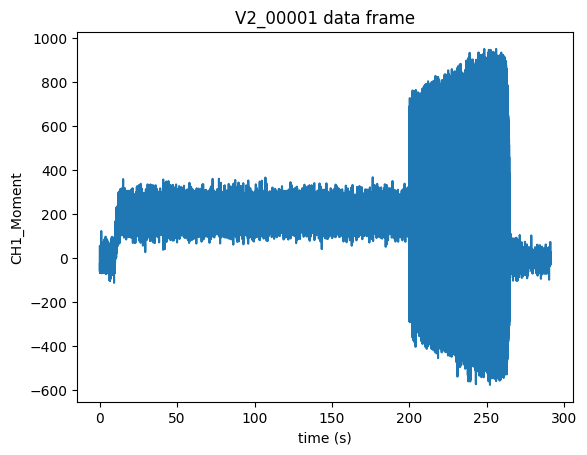

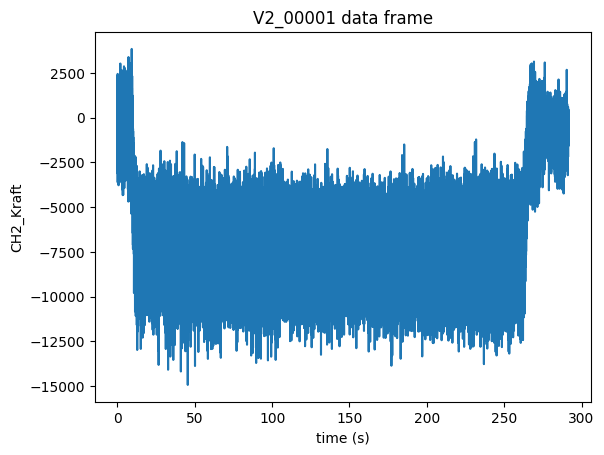

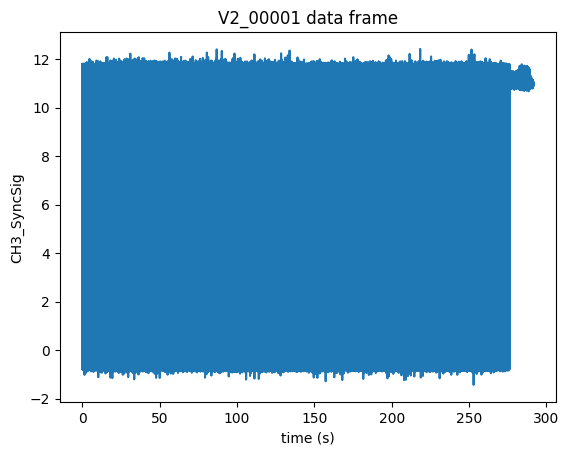

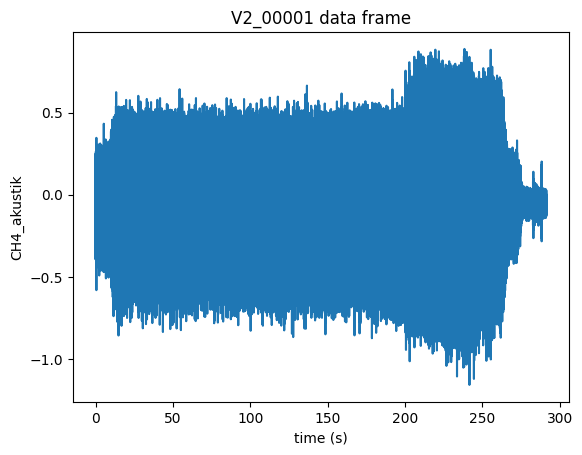

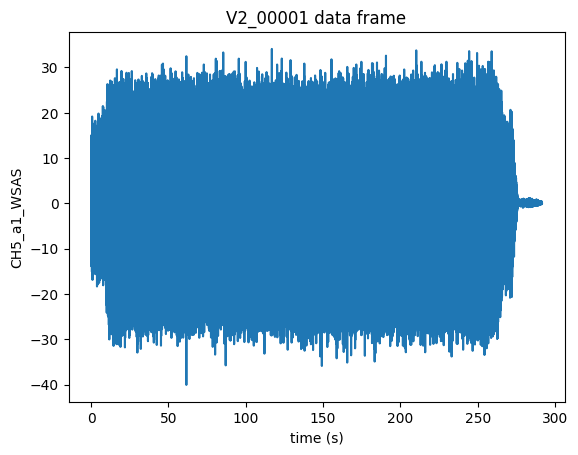

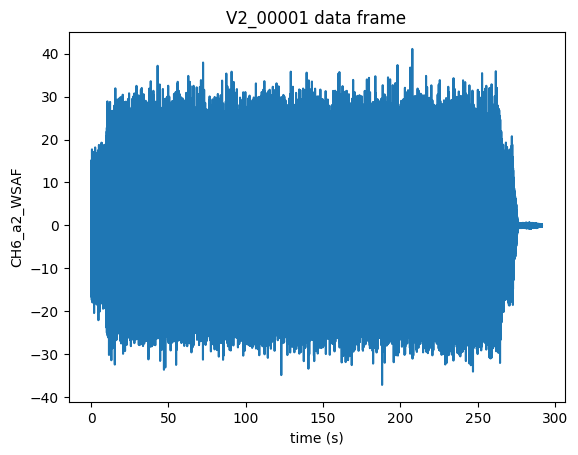

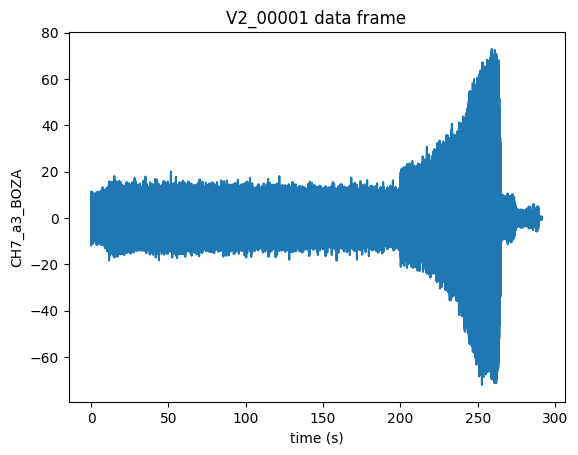

In [28]:
for column in df2.columns:
    if column != 'time':
        plot_column_over_time(df2, column, title="V2_00001 data frame")

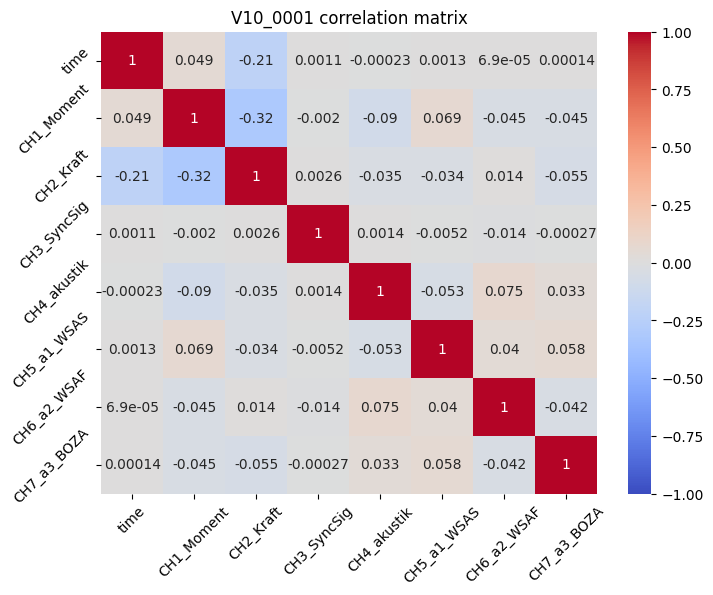

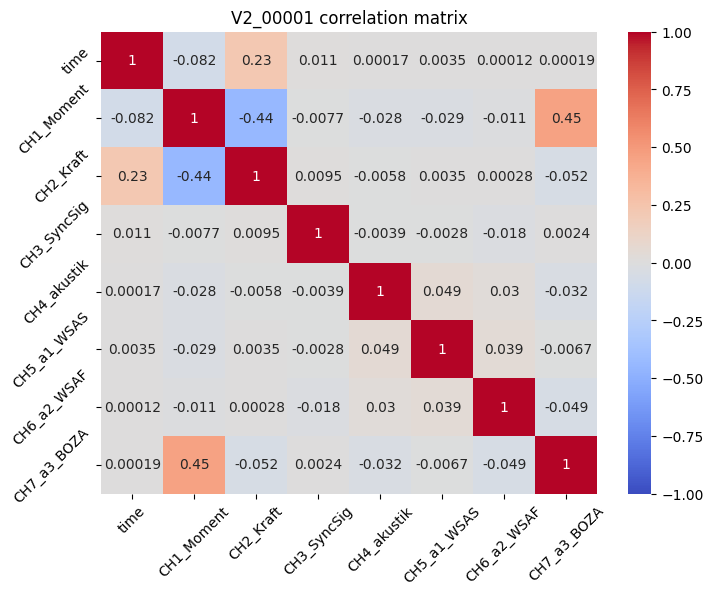

In [75]:
df1.corr()

# plot the correlation matrix with sns heatmap
import seaborn as sns


def plot_corr_matrix(df: pl.DataFrame, title: str):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"{title} correlation matrix")
    # set tick labels to columns
    plt.xticks(ticks=[x + 0.5 for x in range(8)], labels=df.columns)
    plt.yticks(ticks=[x + 0.5 for x in range(8)], labels=df.columns)
    # set the tick labels to the correct rotation
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

plot_corr_matrix(df1, "V10_0001")
plot_corr_matrix(df2, "V2_00001")

# Rolling mean

In [73]:
def rolling_means_df(df: pl.DataFrame, window_size: int) -> pl.DataFrame:
    return df.with_columns([pl.col(col).rolling_mean(window_size) for col in df.columns if col != 'time']).drop_nulls()


df1_roll = rolling_means_df(df1, 20000)
df2_roll = rolling_means_df(df2, 20000)

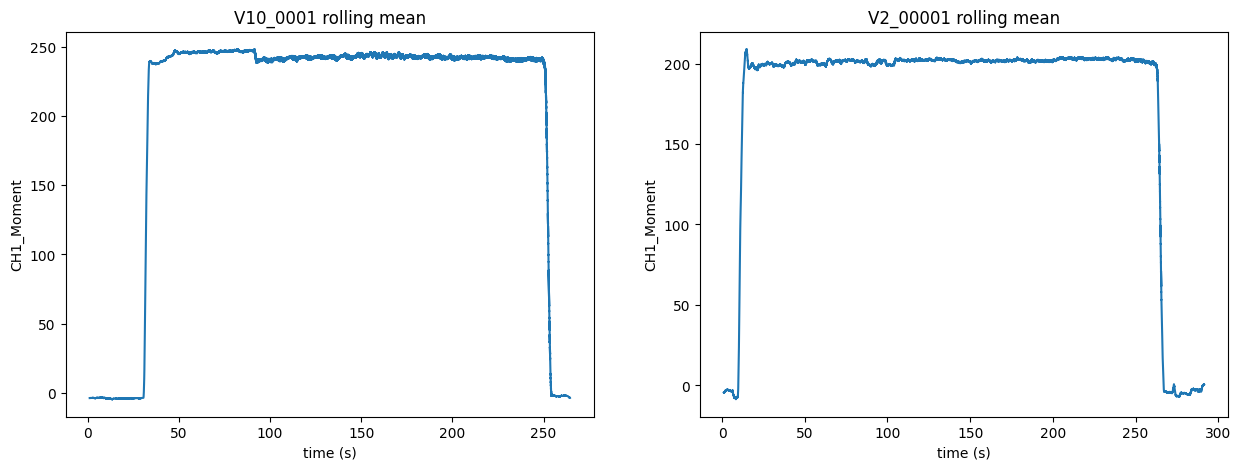

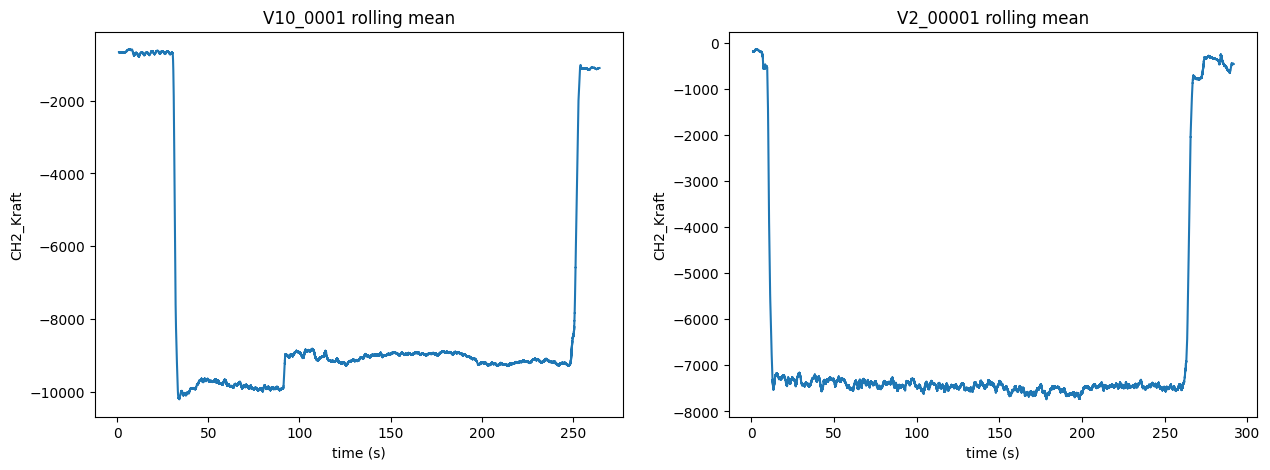

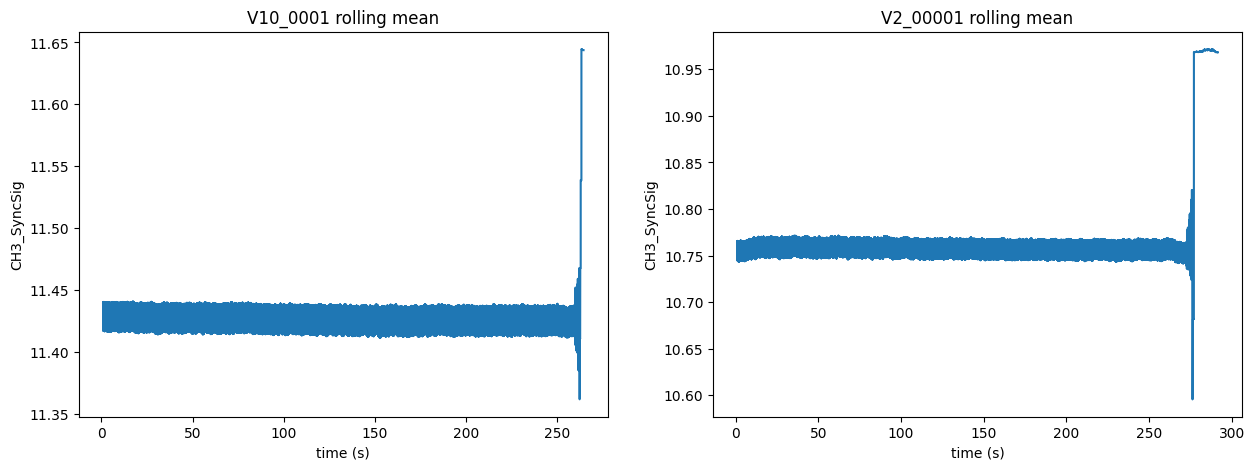

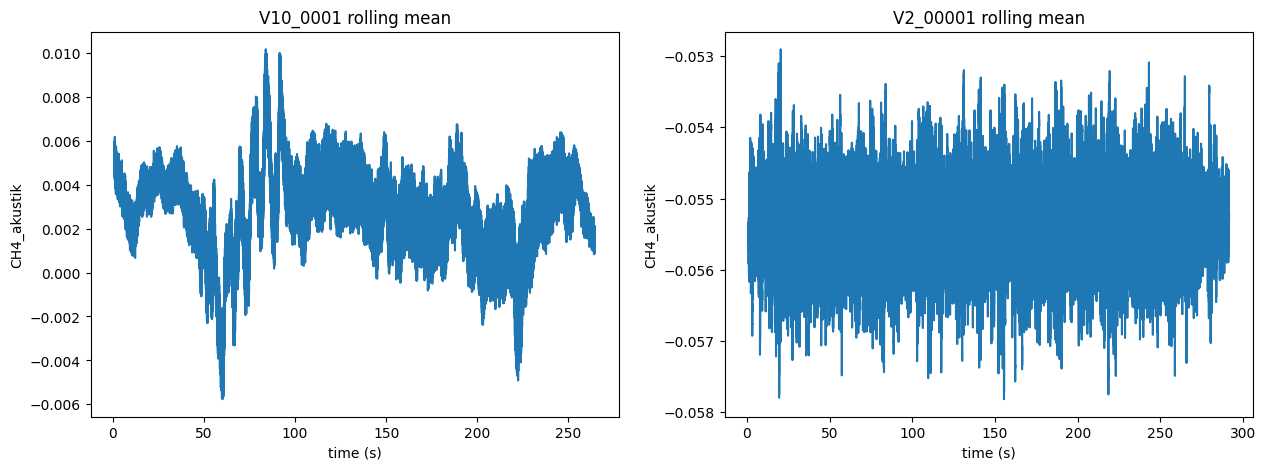

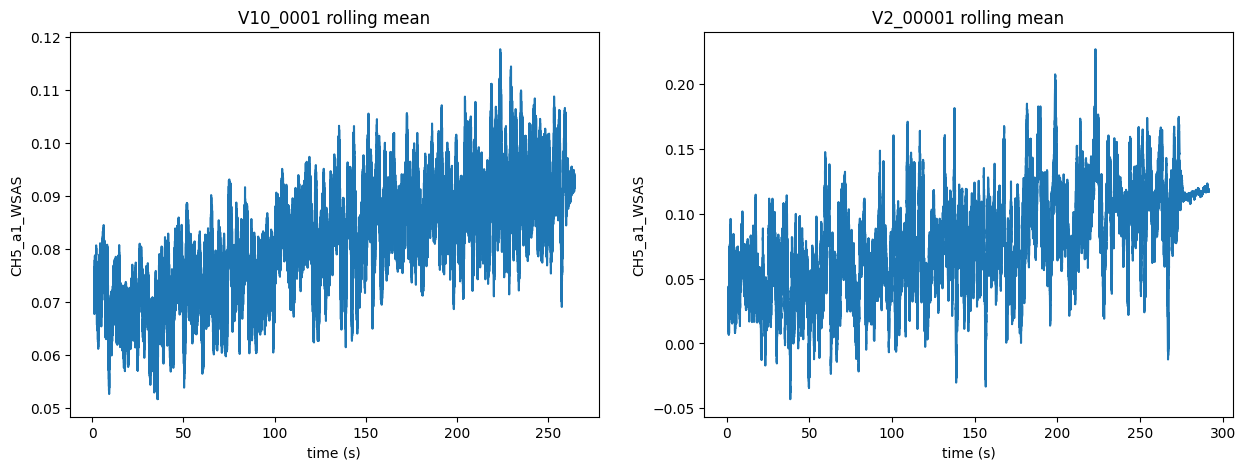

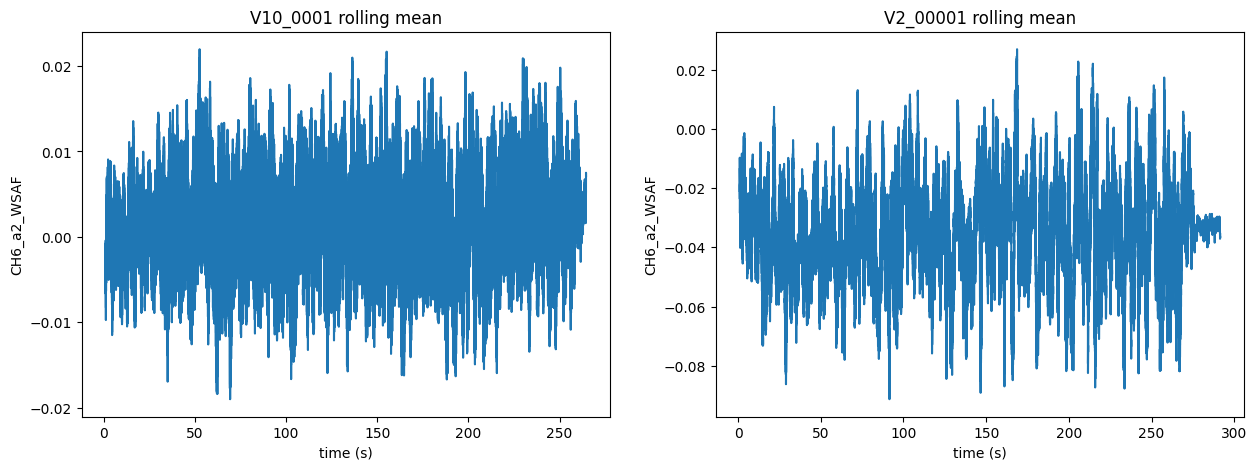

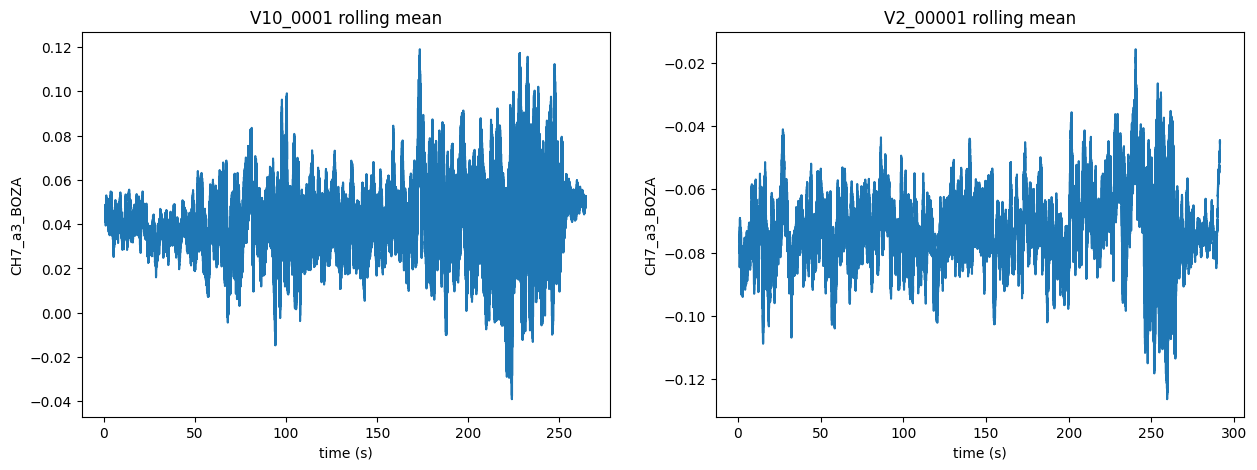

In [74]:
for column in df1_roll.columns:
    if column != 'time':
        plot_column_over_time_compare(df1_roll, df2_roll, column, title1="V10_0001 rolling mean", title2="V2_00001 rolling mean")

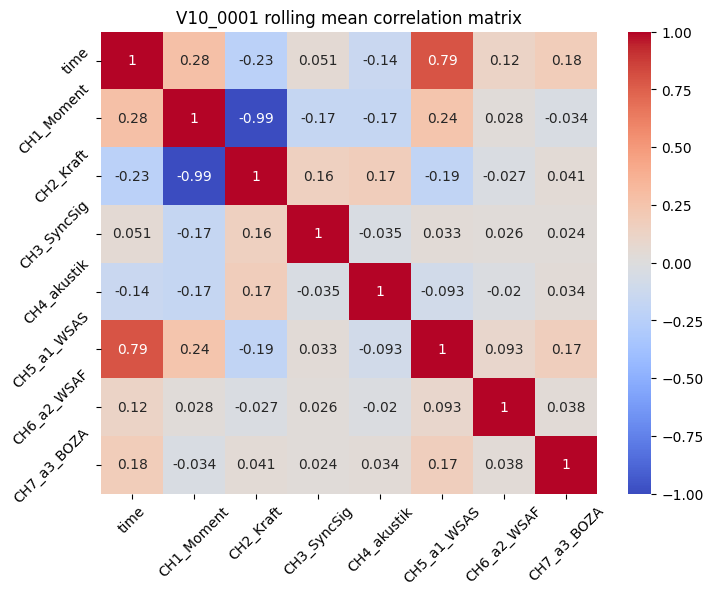

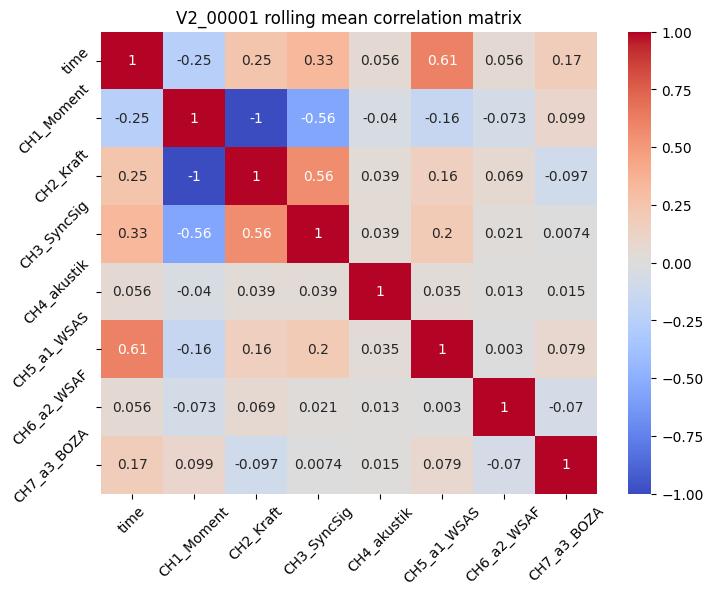

In [77]:

plot_corr_matrix(df1_roll, "V10_0001 rolling mean")
plot_corr_matrix(df2_roll, "V2_00001 rolling mean")